# Week 2

## 1. Multivariate Linear Regression

### - Multiple Features
&nbsp; $h(x) = \theta^Tx$<br>

&nbsp; Note that $h(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$&nbsp; (with n features). Define $x_0 = 1$.

### - Gradient Descent for Multiple Variables
* New gradient descent algorithm<br>
repeat : {
    $$\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}(h(x_i)-y_i)x_j$$
    }<br>
* Feature Scaling vs Mean Normalization<br>
&nbsp; - Feature Scaling (dividing the input values by the range)
$$x_i := \frac{x_i}{max-min}$$
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  - Mean Normalization  ($s_i$: range or std)<br>
$$x_i := \frac{x_i - \mu_i}{s_i}$$ 

* Learning Rate ($\alpha$)<br>
&nbsp; - Debugging gradient descent<br>
 : Make a plot with number of iterations on the x-axis. Now plot the cost function, J(θ) over the number of iterations of gradient descent. If J(θ) ever increases, then you probably need to decrease α.<br>
&nbsp; - Automatic convergence test<br>
 : Declare convergence if J(θ) decreases by less than E in one iteration, where E is some small value such as $10^{-3}$. However in practice it's difficult to choose this threshold value.

### - Features and Polynomial Regression
* We can **combine** multiple features into one. i.e. $x_3 = x_1 * x_2$<br>
* We can **change the behavior or curve**<br>
&nbsp; - $h(x) = \theta_0 + \theta_1x_1 + \theta_2x_1^2$ (quadratic)<br>
&nbsp; - $h(x) = \theta_0 + \theta_1x_1 + \theta_2x_1^2 + \theta_3x_1^3$ (cubic)<br>
&nbsp; - $h(x) = \theta_0 + \theta_1x_1 + \theta_2\sqrt{x_1}$ (square root)<br>
&nbsp; **$\Rightarrow$ FEATURE SCALING is important**

## 2. Computing Parameters Analytically

### - Normal Equation
&nbsp; : Method to solve for $\theta$ analytically (without iteration)<br>
&nbsp; : Add feature $x_0 = 1$ to make matrix X<br>
&nbsp; : $\theta = (X^TX)^{-1}X^Ty$ &nbsp; (X : m*(n+1) matrix, y : m-dimensional vector)<br>
&nbsp; : No need for feature scaling
* Gradient Descent vs Nomal Equation<br>

| Gradient Descent | Nomal Equation |
| --- | --- |
| Need to choose $\alpha$ | No need to choose $\alpha$ |
| Iterations | No iteration |
| Works well with large features | Slow with large features  |

* Noninvertibility of $X^TX$<br>
&nbsp; - Redundant features : multiple features are linearly dependent<br>
&nbsp; - Too many features (e.g. m ≤ n) : delete some features or use *regularization*


## 3. MATLAB

### - Workflow
1. Select X and y : X(features), y(target)<br>
2. Plotting the data : to understand data better<br>
3. Computing the cost $J(\theta)$<br>
&nbsp; - add a column of ones to X<br>
&nbsp; - J = (sum((X * theta) - y))^2 / (2 * m);<br>
4. Updating $\theta$<br>
5. Get the optimized $\theta$<br>
6. Plot the model
7. Predict : using [1, $x_1$, ... , $x_n$]

### - Syntax
* eye(n); &nbsp; &nbsp; &nbsp; &nbsp;% n*n identical matrix
* data = load('ex1data1.txt'); &nbsp; &nbsp; &nbsp; &nbsp; % read comma separated data
* X = data(:, 1); y = data(:, 2); &nbsp; &nbsp; &nbsp; &nbsp; % (n-th row, n-th column)
* plot(X, y, 'rx', 'MarkerSize', 10); &nbsp; &nbsp; &nbsp; &nbsp; % plot the data<br>
xlabel('x label'); &nbsp; &nbsp; &nbsp; &nbsp; % set the x-axis label<br>
ylabel('y label'); &nbsp; &nbsp; &nbsp; &nbsp; % set the y-axis label<br>
* X = [ones(m,1),data(:,1)]; &nbsp; &nbsp; &nbsp; &nbsp; % Add a column of ones to x
* for iter = 1:num_iters<br>
&nbsp; theta = theta - alpha * (X' * (X * theta - y)) / m; &nbsp; &nbsp; &nbsp; &nbsp; % update theta<br> 
end<br>
* fprintf('Theta computed from gradient descent:\n%f,\n%f',theta(1),theta(2)) &nbsp; &nbsp; &nbsp; &nbsp; % print $\theta_0$ and $\theta_1$<br>
* hold on; &nbsp; &nbsp; &nbsp; &nbsp; % keep previous plot visible<br>
&nbsp; plot(X(:,2), X*theta, '-') &nbsp; &nbsp; &nbsp; &nbsp; % plot $x_1$ and $y$<br>
&nbsp; legend('Training data', 'Linear regression') &nbsp; &nbsp; &nbsp; &nbsp; % legend<br>
&nbsp; hold off &nbsp; &nbsp; &nbsp; &nbsp; % don't overlay any more plots on this figure<br>

## 4. Using Pyton Numpy

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [300]:
# Load the data
data = pd.read_csv('ex1data1.csv')
data.head()

,x_1,x_2
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [301]:
# Separate features(X) and target(y)
X = data.iloc[:, 0]
y = data.iloc[:, 1]

Text(0, 0.5, 'Profit in $10,000s')

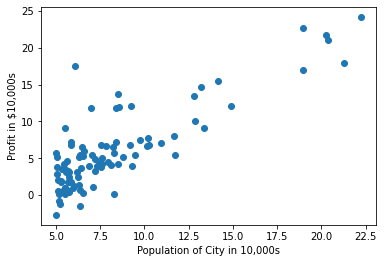

In [302]:
# Plot
plt.scatter(X, y)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

In [303]:
m = len(X)          # number of training examples
o = pd.DataFrame(np.ones(m), columns=["x_0"])
X = pd.concat([o, X], axis=1)       # add a column of ones to x 
th1 = np.zeros([1, 2])               # initialize fitting parameters
th2 = np.zeros([2, 1])               # initialize fitting parameters
iterations = 1500
al = 0.01   

In [304]:
def computeCost(X, y, th):
    "Compute cost function for fixed theta's"""
    m = len(X)
    n = len(X.columns)
    th = np.tile(th, (m, 1))    # cloning to (m * n) matrix
    s = 0       # sum of (X * th)
    for i in range(m):
        for j in range(n):
            s += X.iat[i, j] * th[i, j]

    return (s - sum(y))**2 / (2*m)

In [ ]:
'''Using np.matmul. Debug needed'''
# def computeCost2(X, y, th):
#     "Compute cost function for fixed theta's"""
#     m = len(X)
#     h = np.matmul(X, th)

#     # return np.sum((h-y)**2)/(2*m)
#     return np.sum(((h-y)**2)/(2*m))

# A = np.array([[2, 3, 1], [5, 6, 1]])
# B = np.array([[1, 2,], [3, 4], [1, 1]])
# H = np.matmul(A, B)
# I = np.array([[1, 1], [1, 1]])
# k = 5
# print(H)
# print(H-I)
# print((H-I)**2)
# print(np.sum((H-I)**2))
# print(np.sum((H-I)**2)/(2*k))


In [305]:
print(computeCost(X, y, th1))
print(computeCost(X, y, np.array([[-1, 2]])))

# print(computeCost2(X, y, th2))
# print(computeCost2(X, y, np.array([[-1], [2]])))


1653.6316602845868
4359.141958484595


In [ ]:
'''Using np.matmul. Debug needed'''
def gradientDescent(X, y, th, al, iterations):
    m = len(y)
    j_history = []
    
    for iter in range(iterations):
        h = np.matmul(X, th)
        th = th - np.matmul(X.T, h-y)*al/m
        j_history.append(computeCost(X, y, th.T))

    return th, th.size      # why is th's size 2*97?

In [ ]:
gradientDescent(X, y, th2, al, iterations)